In [33]:
# Import required packages
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [35]:
test_image = cv2.imread('/home/nishant/Wipro/work/Dataset/SKU_Identification/Testimage/softouch_small/BoxImage_0209.jpg') 

In [38]:
import cv2 
import pytesseract

img = test_image

# Adding custom options
custom_config = r'--oem 3 --psm 6'
text123 = pytesseract.image_to_string(img, config=custom_config,lang = 'eng')

In [39]:
text123

'oe teh me 7,\n\n= a! ay) : , 7\n\nI ie ome\n\n= oe en DLL\n\n= = veo) oe [lem] ah a= | “a oo\n\n\' i lt | = 66 oe\nSoft 7 Softouclt cs\n\ni EE Sof ’ Load | ot\n\nSage ont t Be - a aa a\n\n2a... | sey" = ad ae\n\n| eee = |\n5 inl f, Sumas oes\n\n| sopoust 1 nd Lee\n\na es { Se | ae\n\nf oe pe itil\n\n| 290 RE pce\n\nrand (18m! F fos _— . ae\n\n3 aie J = ja\n\nfe | ey\n\x0c'

In [21]:
target_image = cv2.imread('/home/nishant/Wipro/work/Dataset/SKU_Identification/Targetimage/softouch_small/BoxImage_0209.jpg')

In [22]:
sample_image = cv2.imread('download.jpeg')

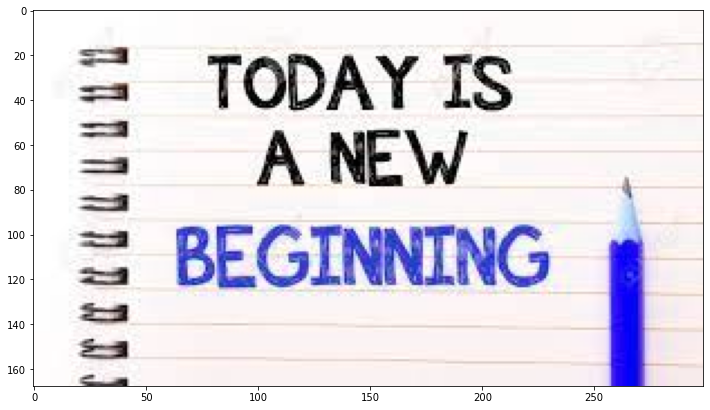

In [23]:
display(sample_image)

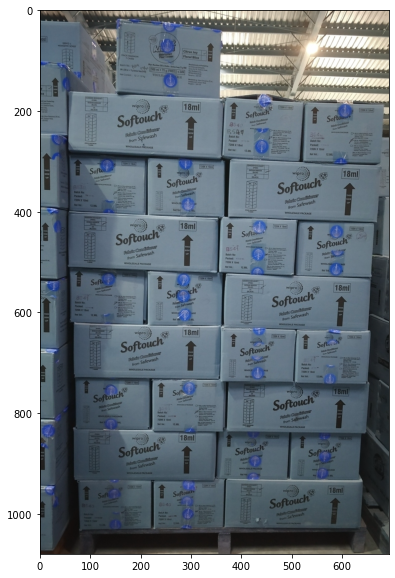

In [24]:
display(test_image)

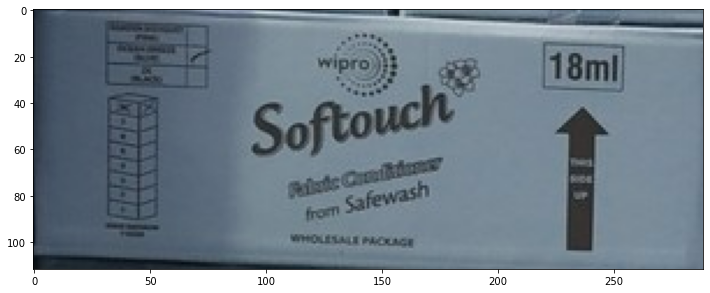

In [25]:
display(target_image)

In [26]:
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)


In [27]:
text = pytesseract.image_to_string(thresh1)

In [28]:
text

' \n\n \n\n \n\n \n\n \n\x0c'

In [12]:
text2 = pytesseract.image_to_string(target_image)

In [13]:
text3 = pytesseract.image_to_string(sample_image)

In [14]:
text3

'POU ddd\n\nTODAY IS\nA NEW .\n\nBEGINNING {\n\x0c'

In [15]:
text2

' \n\x0c'

In [16]:
text

' \n\x0c'

In [29]:
gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Appplying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = test_image.copy()

# A text file is created and flushed
"""
file = open("recognized.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
"""
L=[]
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]

    # Open the file in append mode
    #file = open("recognized.txt", "a")

    # Apply OCR on the cropped image
    #text = pytesseract.image_to_string(cropped)
    #L.append(text)

    # Appending the text into file
    #file.write(text)
    #file.write("\n")

    # Close the file
    #file.close


In [32]:
cv2.namedWindow("Threshold", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Threshold", 600,600)
cv2.imshow("Threshold",thresh1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
cv2.namedWindow("Dilation", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Dilation", 600,600)
cv2.imshow("Dilation",dilation)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
contours

[array([[[0, 0]],
 
        [[0, 1]],
 
        [[0, 2]],
 
        ...,
 
        [[3, 0]],
 
        [[2, 0]],
 
        [[1, 0]]], dtype=int32)]

In [30]:
cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Image", 600,600)
cv2.imshow("Image",im2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
L

['      \n   \n\n \n\n \n\nveo} ag [emi]\n\ni= |\n\n \n\n \n \n\n \n\n \n\x0c']

In [2]:
import cv2
import numpy as np
import pytesseract

test_image = cv2.imread('/home/nishant/Wipro/work/Dataset/SKU_Identification/Testimage/softouch_small/BoxImage_0209.jpg') 
# Load image, convert to HSV format, define lower/upper ranges, and perform
# color segmentation to create a binary mask
image = test_image
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([0, 0, 218])
upper = np.array([157, 54, 255])
mask = cv2.inRange(hsv, lower, upper)

# Create horizontal kernel and dilate to connect text characters
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,3))
dilate = cv2.dilate(mask, kernel, iterations=5)

# Find contours and filter using aspect ratio
# Remove non-text contours by filling in the contour
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ar = w / float(h)
    if ar < 5:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)

# Bitwise dilated image with mask, invert, then OCR
result = 255 - cv2.bitwise_and(dilate, mask)
data = pytesseract.image_to_string(result, lang='eng',config='--psm 6')
print(data)

cv2.imshow('mask', mask)
cv2.imshow('dilate', dilate)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

* ON Se PEE ee

